<a href="https://colab.research.google.com/github/bharathipilli/Attack-Classification-using-BNN-ML/blob/main/Attacks_Classification_using_BNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Attack Classification with Bayesian Neural Network with Tensor Flow**

In [ ]:
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:

#Importing neccessary libraries

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import tensorflow as tf  # Main TensorFlow library for neural networks
import tensorflow_probability as tfp  # TensorFlow Probability for probabilistic layers
from sklearn.preprocessing import StandardScaler  # For scaling features
import networkx as nx  # For creating and handling graphs
from networkx.drawing.nx_agraph import graphviz_layout  # For layout of graphs using Graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and one-hot encoding
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets

#Loading dataset

In [ ]:

# Import necessary libraries for Google Colab and data handling
from google.colab import drive  # Google Colab library to interact with Google Drive
import os  # Operating system library for directory operations
import pandas as pd  # Pandas library for data manipulation and analysis

# Mount Google Drive to access files
drive.mount('/content/gdrive')  # Mount the Google Drive to the specified directory

# Change directory to the location within Google Drive where the data file is stored
os.chdir('/content/gdrive/My Drive')  # Change current working directory

# Load the dataset using pandas
data = pd.read_csv("UNSW_NB15_train_test.csv")  # Read the CSV file into a pandas DataFrame

# Display the first few rows of the dataset to verify successful loading
data.head()  # Display the first five rows of the DataFrame

Mounted at /content/gdrive


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.000011,120,7,6,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,7
1,0.000008,120,7,6,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,7
2,0.000005,120,7,6,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,7
3,0.000006,120,7,6,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,7
4,0.000010,120,7,6,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257670 entries, 0 to 257669
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257670 non-null  float64
 1   proto              257670 non-null  int64  
 2   service            257670 non-null  int64  
 3   state              257670 non-null  int64  
 4   spkts              257670 non-null  int64  
 5   dpkts              257670 non-null  int64  
 6   sbytes             257670 non-null  int64  
 7   dbytes             257670 non-null  int64  
 8   rate               257670 non-null  float64
 9   sttl               257670 non-null  int64  
 10  dttl               257670 non-null  int64  
 11  sload              257670 non-null  float64
 12  dload              257670 non-null  float64
 13  sloss              257670 non-null  int64  
 14  dloss              257670 non-null  int64  
 15  sinpkt             257670 non-null  float64
 16  di

In [ ]:
data['attack_cat'].unique()

array([ 7,  8,  2,  3,  4,  1,  5, 10,  9,  6])

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


Epoch 1/5
3020/3020 [==============================] - 32s 9ms/step - loss: 1.2168 - accuracy: 0.7022 - val_loss: 0.9374 - val_accuracy: 0.7938
Epoch 2/5
3020/3020 [==============================] - 23s 8ms/step - loss: 1.0741 - accuracy: 0.7415 - val_loss: 0.8968 - val_accuracy: 0.7940
Epoch 3/5
3020/3020 [==============================] - 21s 7ms/step - loss: 1.0201 - accuracy: 0.7524 - val_loss: 0.8552 - val_accuracy: 0.7990
Epoch 4/5
3020/3020 [==============================] - 22s 7ms/step - loss: 0.9779 - accuracy: 0.7592 - val_loss: 0.8228 - val_accuracy: 0.8061
Epoch 5/5
3020/3020 [==============================] - 22s 7ms/step - loss: 0.9429 - accuracy: 0.7654 - val_loss: 0.7979 - val_accuracy: 0.8123
Training Accuracy: 0.7862


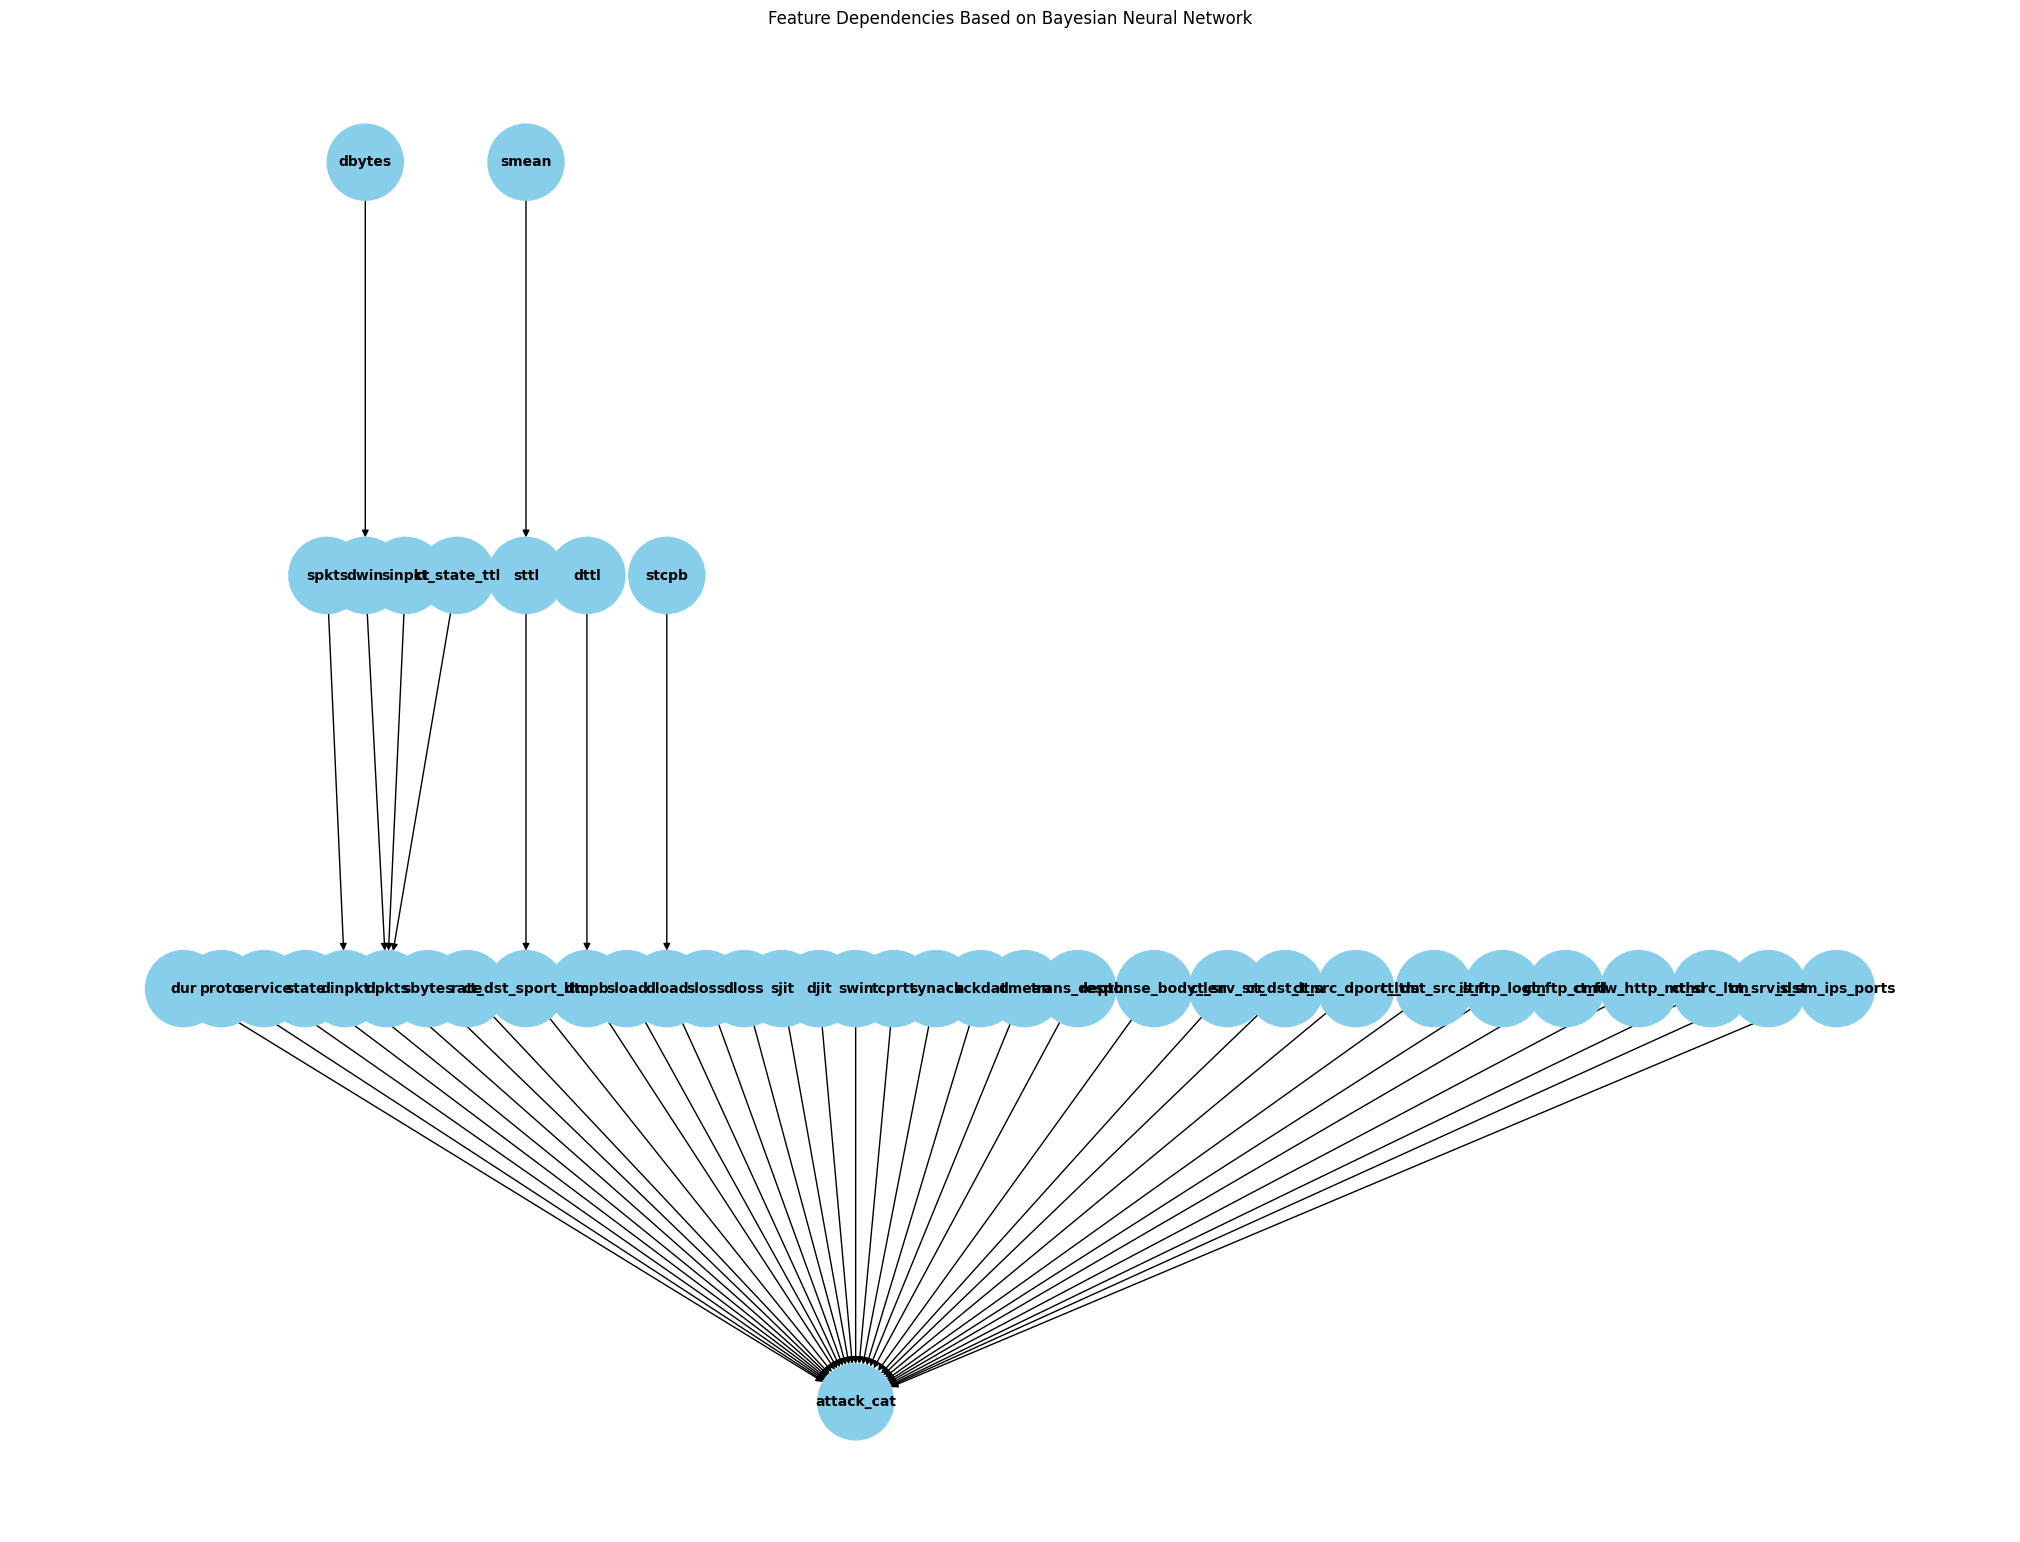

In [ ]:

# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # Main TensorFlow library for neural networks
import tensorflow_probability as tfp  # TensorFlow Probability for probabilistic layers
from sklearn.preprocessing import StandardScaler  # For scaling features
import networkx as nx  # For creating and handling graphs
import matplotlib.pyplot as plt  # For plotting graphs
from networkx.drawing.nx_agraph import graphviz_layout  # For layout of graphs using Graphviz

# Define a class encapsulating the Bayesian Neural Network and feature dependency analysis
class BayesianNNFeatureAnalysis:
    def __init__(self, data):
        self.data = data  # Initial dataset
        self.features = data.iloc[:, :-1].values  # Select all columns except the last as features
        self.target = data.iloc[:, -1].values  # Select the last column as the target
        self.feature_names = data.columns[:]  # Save feature names (including the target name)
        self.scaler = StandardScaler()  # Object for standardizing features
        self.features_scaled = self.scaler.fit_transform(self.features)  # Standardize the features
        self.target_one_hot, self.num_classes = self._prepare_target()  # Prepare one-hot encoded target and get number of classes
        self.model = self._build_model()  # Build the Bayesian Neural Network model

    # Method to prepare the one-hot encoded target variable and count unique classes
    def _prepare_target(self):
        target = self.target - 1  # Adjust target for one-hot encoding
        num_classes = len(np.unique(target))  # Count unique classes
        target_one_hot = tf.keras.utils.to_categorical(target, num_classes=num_classes)  # One-hot encode the target
        return target_one_hot, num_classes  # Return one-hot encoded target and number of classes

    # Method to define kernel divergence function for regularization
    def _kernel_divergence_fn(self, q, p, _):
        return tfp.distributions.kl_divergence(q, p) / tf.cast(self.features_scaled.shape[0], tf.float32)  # KL-divergence scaled by number of samples

    # Method to build the Bayesian Neural Network model
    def _build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(self.features_scaled.shape[1],)),  # Input layer with shape of features
            tfp.layers.DenseFlipout(256, activation='relu', kernel_divergence_fn=self._kernel_divergence_fn),  # Bayesian Dense layer with Flipout
            tf.keras.layers.Dropout(0.3),  # Dropout layer to prevent overfitting
            tfp.layers.DenseFlipout(128, activation='relu', kernel_divergence_fn=self._kernel_divergence_fn),  # Second Bayesian Dense layer
            tf.keras.layers.Dropout(0.3),  # Second Dropout layer
            tfp.layers.DenseFlipout(self.num_classes, activation='softmax', kernel_divergence_fn=self._kernel_divergence_fn)  # Output layer with softmax activation
        ])

        # Compile the model with Adam optimizer and categorical cross-entropy loss
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model  # Return the compiled model

    # Method to train the Bayesian Neural Network model
    def train_model(self, epochs=5, batch_size=64, validation_split=0.25, patience=10):
        # Early stopping callback to prevent overfitting
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
        history = self.model.fit(self.features_scaled, self.target_one_hot,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_split=validation_split,
                                 callbacks=[early_stopping])  # Fit the model to the data with validation split
        return history  # Return training history

    # Method to evaluate the model
    def evaluate_model(self):
        train_loss, train_accuracy = self.model.evaluate(self.features_scaled, self.target_one_hot, verbose=0)  # Evaluate on training data
        return train_accuracy  # Return training accuracy

    # Method to get weights from the first DenseFlipout layer
    def get_layer_weights(self):
        for layer in self.model.layers:
            if isinstance(layer, tfp.layers.DenseFlipout):  # Check for DenseFlipout layer type
                return layer.kernel_posterior.mean().numpy()  # Extract mean weights
        return None  # Return None if no DenseFlipout layer is found

    # Method to analyze feature dependencies based on layer weights
    def analyze_dependencies(self):
        layer_weights = self.get_layer_weights()  # Get layer weights
        if layer_weights is not None:
            max_dependencies = np.argmax(np.abs(layer_weights), axis=1)  # Find max dependencies
            max_dependencies = np.clip(max_dependencies, 0, len(self.feature_names) - 1)  # Ensure indices are within bounds
            return max_dependencies  # Return max dependencies
        return None  # Return None if no weights are found

    # Method to plot feature dependencies using a directed graph
    def plot_feature_dependencies(self):
        max_dependencies = self.analyze_dependencies()  # Analyze dependencies
        if max_dependencies is None:
            print("No dependencies found.")
            return

        G = nx.DiGraph()  # Create a directed graph

        for feature_name in self.feature_names:
            G.add_node(feature_name, color='skyblue', style='filled')  # Add feature nodes to the graph

        for i, j in enumerate(max_dependencies):
            if i < len(self.feature_names) and j < len(self.feature_names):  # Ensure indices are within bounds
                G.add_edge(self.feature_names[i], self.feature_names[j])  # Add directed edges based on dependencies

        # Plot the graph
        plt.figure(figsize=(20, 15))  # Set figure size
        pos = graphviz_layout(G, prog="dot")  # Use Graphviz layout
        nx.draw(G, pos, with_labels=True, node_size=3000,
                node_color=[G.nodes[node]['color'] for node in G],
                font_size=10, font_color="black", font_weight="bold", arrows=True)  # Draw the graph
        plt.title('Feature Dependencies Based on Bayesian Neural Network')  # Add title
        plt.show()  # Show plot

# Main function to run the whole process
def main():

    bnn_analysis = BayesianNNFeatureAnalysis(data)  # Instantiate the analysis class with data
    bnn_analysis.train_model(epochs=5)  # Train the model for 5 epochs
    train_accuracy = bnn_analysis.evaluate_model()  # Evaluate model accuracy
    print(f'Training Accuracy: {train_accuracy:.4f}')  # Print training accuracy
    bnn_analysis.plot_feature_dependencies()  # Plot feature dependencies

# Run the main function if this script is executed directly
if __name__ == "__main__":
    main()

In [ ]:
# Print the shape of the dataset to understand its dimensions
print("Dataset shape:", data.shape)

# Assuming the last column is the target variable and the remaining columns are features
X = data.iloc[:, :-1].values  # Select all columns except the last as features
y = data.iloc[:, -1].values  # Select the last column as the target variable

# Print shapes of features and target to verify correct selection
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

# Convert the target variable to one-hot encoding for multi-class classification
onehot_encoder = OneHotEncoder(sparse_output=False)  # Instantiate the OneHotEncoder without sparse output
y = onehot_encoder.fit_transform(y.reshape(-1, 1))  # Reshape and transform the target variable

# Verify the one-hot encoded dimensions
print(f"One-hot encoded target shape: {y.shape}")

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()  # Instantiate the standard scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training features
X_test = scaler.transform(X_test)  # Transform the test features

# Split the training data into training and validation sets (80-20 split of the training set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes of training, validation, and test sets to verify the split
print(f"Training features shape (X_train): {X_train.shape}")
print(f"Validation features shape (X_val): {X_val.shape}")
print(f"Test features shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Validation target shape (y_val): {y_val.shape}")
print(f"Test target shape (y_test): {y_test.shape}")

Dataset shape: (257670, 43)
Features shape (X): (257670, 42)
Target shape (y): (257670,)
One-hot encoded target shape: (257670, 10)
Training features shape (X_train): (164908, 42)
Validation features shape (X_val): (41228, 42)
Test features shape (X_test): (51534, 42)
Training target shape (y_train): (164908, 10)
Validation target shape (y_val): (41228, 10)
Test target shape (y_test): (51534, 10)


In [ ]:
# Function to create a Bayesian Neural Network (BNN) model
def create_bnn_model(input_shape, output_shape):
    # Define the Sequential model
    model = tf.keras.Sequential([
        # Input layer with the specified input shape
        tf.keras.layers.InputLayer(input_shape=input_shape),

        # 1st Dense layer with 512 units, ReLU activation, and L2 regularization
        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        tf.keras.layers.BatchNormalization(),  # Batch normalization for improved training stability

        # 2nd Dense layer with 256 units, ReLU activation, and L2 regularization
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        tf.keras.layers.BatchNormalization(),  # Batch normalization for improved training stability

        # 3rd Dense layer with 128 units, ReLU activation, and L2 regularization
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        tf.keras.layers.BatchNormalization(),  # Batch normalization for improved training stability

        # 4th Dense layer with 64 units, ReLU activation, and L2 regularization
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        tf.keras.layers.BatchNormalization(),  # Batch normalization for improved training stability

        # Output layer with the specified output shape and softmax activation for multi-class classification
        tf.keras.layers.Dense(output_shape, activation='softmax')
    ])
    return model  # Return the created model

# Function to compile the Bayesian Neural Network model
def compile_bnn_model(model):
    # Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model  # Return the compiled model

# Create the BNN model with specified input and output shapes
bnn_model = create_bnn_model(input_shape=(42,), output_shape=10)

# Compile the created BNN model
bnn_model = compile_bnn_model(bnn_model)

In [ ]:

# Define early stopping callback to prevent overfitting by stopping training when validation loss doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Define learning rate reduction on plateau callback to reduce learning rate when validation loss stops improving
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Define model checkpoint callback to save the best model based on validation accuracy
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_bnn_model.h5", save_best_only=True, monitor='val_accuracy')

# Train the Bayesian Neural Network model with specified callbacks
history = bnn_model.fit(
    X_train, y_train,  # Training data
    epochs=5,  # Number of epochs to train
    batch_size=32,  # Batch size for training
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping, reduce_lr_on_plateau, checkpoint]  # List of callbacks
)

# Evaluate the model on the test data
loss, accuracy = bnn_model.evaluate(X_test, y_test)

# Print test loss and accuracy to verify model performance
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
5154/5154 [==============================] - 46s 8ms/step - loss: 1.6816 - accuracy: 0.6785 - val_loss: 1.0887 - val_accuracy: 0.7264 - lr: 0.0010
Epoch 2/5
  18/5154 [..............................] - ETA: 32s - loss: 1.2218 - accuracy: 0.6910

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5154/5154 [==============================] - 42s 8ms/step - loss: 1.1467 - accuracy: 0.6994 - val_loss: 1.0339 - val_accuracy: 0.7072 - lr: 0.0010
Epoch 3/5
5154/5154 [==============================] - 40s 8ms/step - loss: 1.0933 - accuracy: 0.7008 - val_loss: 0.9734 - val_accuracy: 0.7254 - lr: 0.0010
Epoch 4/5
5154/5154 [==============================] - 40s 8ms/step - loss: 1.0598 - accuracy: 0.7038 - val_loss: 0.9276 - val_accuracy: 0.7267 - lr: 0.0010
Epoch 5/5
1611/1611 [==============================] - 5s 3ms/step - loss: 0.9378 - accuracy: 0.7250
Test Loss: 0.9377737641334534
Test Accuracy: 0.7249971032142639


In [ ]:
# Function to perform Monte Carlo sampling for Bayesian Inference
def monte_carlo_sampling(bnn_model, data, num_samples=100):
    predictions = np.zeros((num_samples, data.shape[0], 10))
    for i in range(num_samples):
        predictions[i, :, :] = bnn_model(data, training=True)
    mean_predictions = np.mean(predictions, axis=0)
    uncertainty = np.std(predictions, axis=0)
    return mean_predictions, uncertainty

# Perform inference on the training and test dataset
train_mean_predictions, train_uncertainty = monte_carlo_sampling(bnn_model, X_train, num_samples=100)
test_mean_predictions, test_uncertainty = monte_carlo_sampling(bnn_model, X_test, num_samples=100)

# Convert mean predictions from logits to class predictions
train_class_predictions = np.argmax(train_mean_predictions, axis=1)
test_class_predictions = np.argmax(test_mean_predictions, axis=1)
train_actual_classes = np.argmax(y_train, axis=1)
test_actual_classes = np.argmax(y_test, axis=1)

# Calculate accuracy of class predictions
train_accuracy_score = np.mean(train_class_predictions == train_actual_classes)
test_accuracy_score = np.mean(test_class_predictions == test_actual_classes)
print(f"Train Predicted Class Accuracy: {train_accuracy_score}")
print(f"Test Predicted Class Accuracy: {test_accuracy_score}")

# Print Mean Predictions and Uncertainty
print("Sample Mean Predictions and Uncertainty on Test Set:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f" Mean Predictions: {test_mean_predictions[i]}")
    print(f" Uncertainty: {test_uncertainty[i]}")

Train Predicted Class Accuracy: 0.7265444975380212
Test Predicted Class Accuracy: 0.7255404199169481
Sample Mean Predictions and Uncertainty on Test Set:
Sample 1:
 Mean Predictions: [0.00486252 0.0048817  0.0315684  0.10027367 0.24410866 0.01227053
 0.53762913 0.0561305  0.00752742 0.00074747]
 Uncertainty: [0.00546241 0.00415262 0.03031922 0.07969374 0.05750264 0.01426053
 0.13475873 0.03494231 0.00372658 0.00076248]
Sample 2:
 Mean Predictions: [0.05238224 0.04433183 0.25952932 0.40781778 0.07168456 0.00845881
 0.06321684 0.08440732 0.0070139  0.0011574 ]
 Uncertainty: [0.01937796 0.01717345 0.06664337 0.06094661 0.03067252 0.00713169
 0.05145611 0.04249627 0.00469149 0.00076395]
Sample 3:
 Mean Predictions: [3.73621990e-04 4.31476684e-04 3.32710700e-03 7.16420339e-03
 4.10268658e-03 9.70041260e-01 1.18660009e-02 2.19556778e-03
 3.59037939e-04 1.39054999e-04]
 Uncertainty: [0.00136108 0.00152988 0.0114236  0.02496308 0.01197143 0.08068861
 0.02545371 0.00817228 0.00123219 0.00034309